In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SALib.analyze import sobol, pawn

In [9]:
df_in = pd.read_csv('../data/sobol_params.csv')
X = df_in.to_numpy()

In [10]:
df_out = pd.read_csv('../data/sobol_output.csv')
Y = df_out.to_numpy()

In [11]:
seed = 1234

In [12]:
# Define parameters of interest
param_names = ['beta1', 'beta2', 'beta3', 'mu', 'omega', 'theta_0']
param_bounds = [[0.5,3], [-0.9, -0.4], [-0.39, -0.2], [0.25, 0.75], [0.5, 1.5], [0.5, 1.5]]
problem = {
    'num_vars': len(param_names),
    'names': param_names,
    'bounds': param_bounds
}

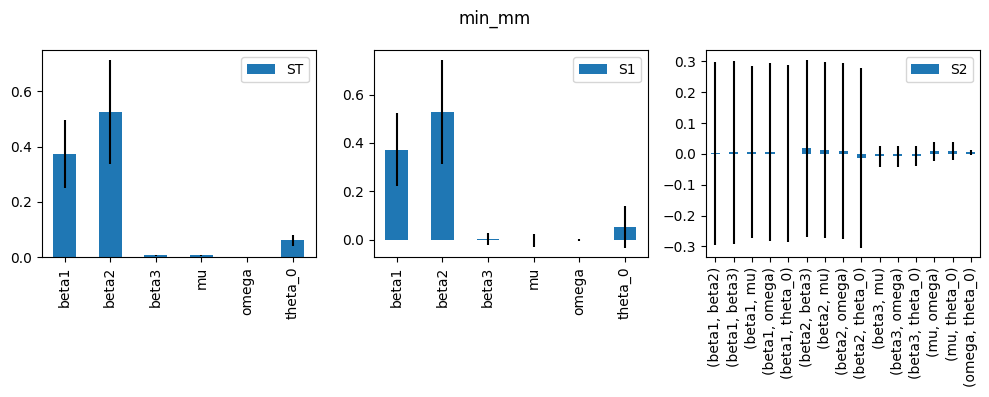

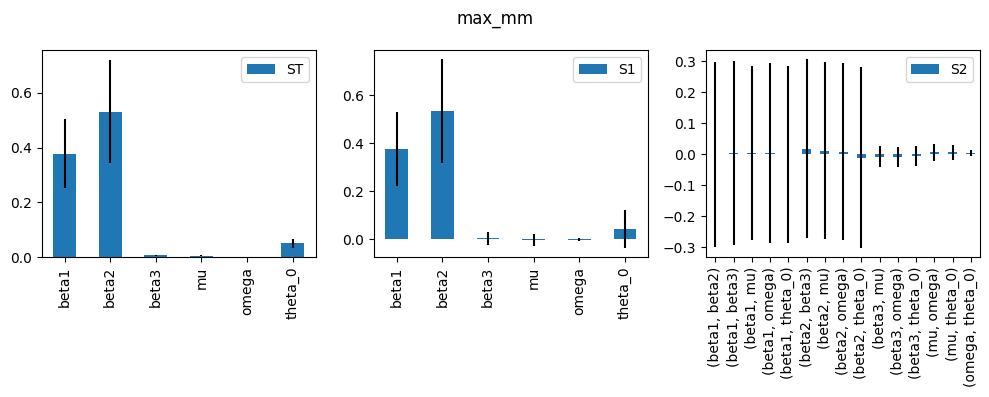

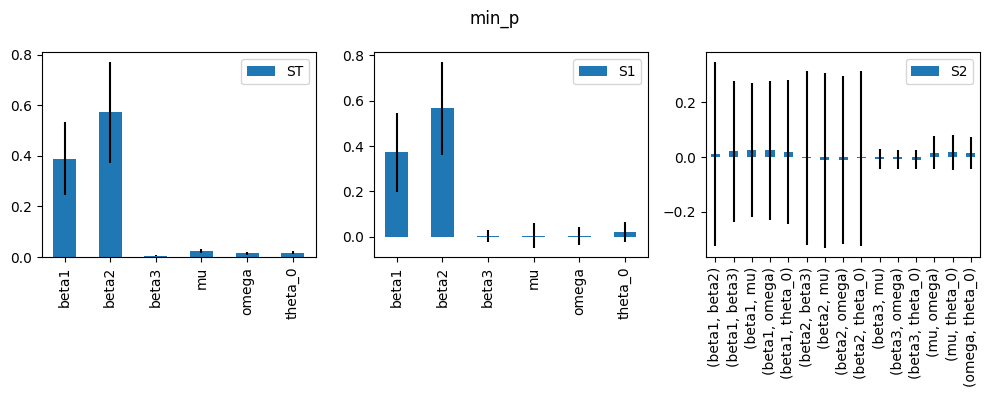

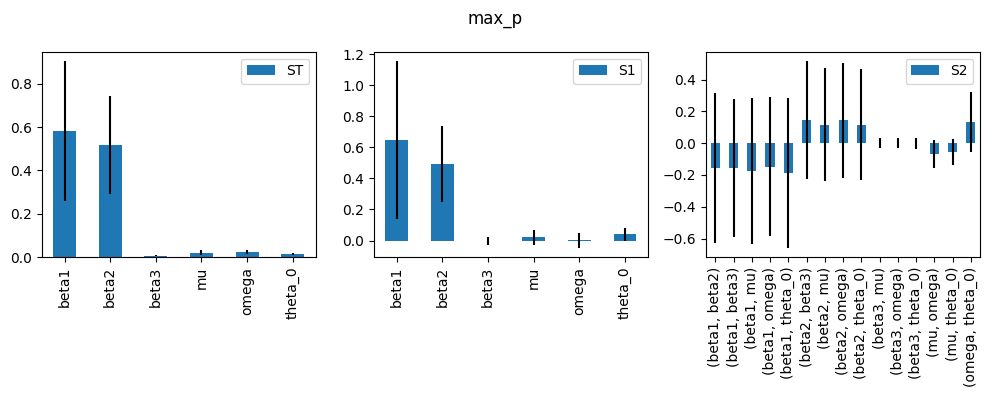

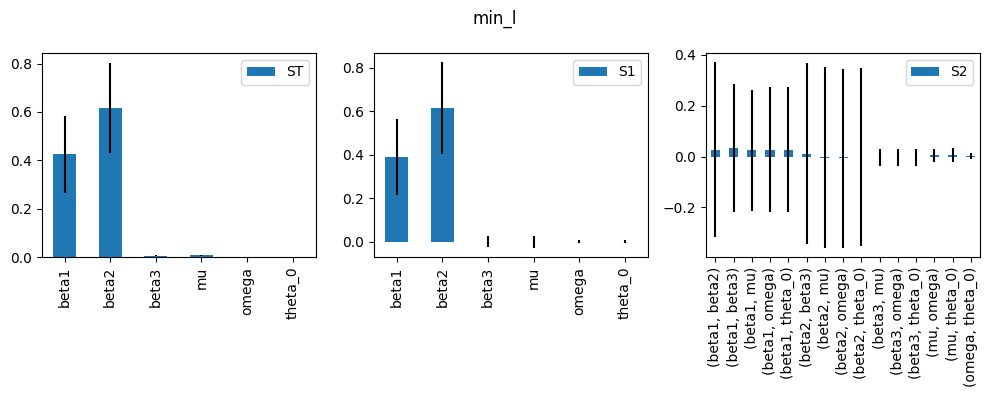

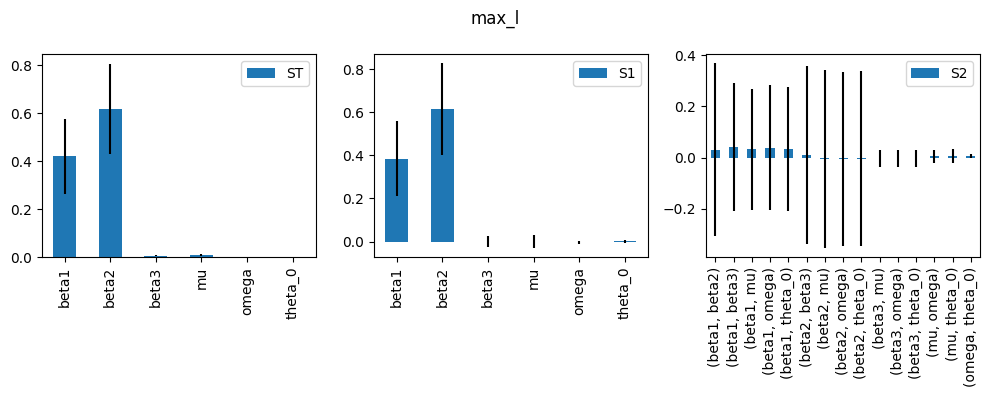

In [13]:
dep_vars = ['min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']
for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_sobol = sobol.analyze(
                        problem, 
                        Y[:, i], 
                        calc_second_order=True, 
                        print_to_console=False, 
                        seed=1234
                    )
    
    axes = Si_sobol.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()

          minimum      mean    median   maximum        CV
beta1    0.126116  0.284043  0.269660  0.454985  0.387339
beta2    0.125744  0.367285  0.379851  0.635789  0.419483
beta3    0.055374  0.110528  0.113439  0.152473  0.331315
mu       0.071944  0.132689  0.110062  0.251803  0.427725
omega    0.060354  0.125389  0.134744  0.175595  0.245104
theta_0  0.067222  0.163934  0.165164  0.267113  0.396136


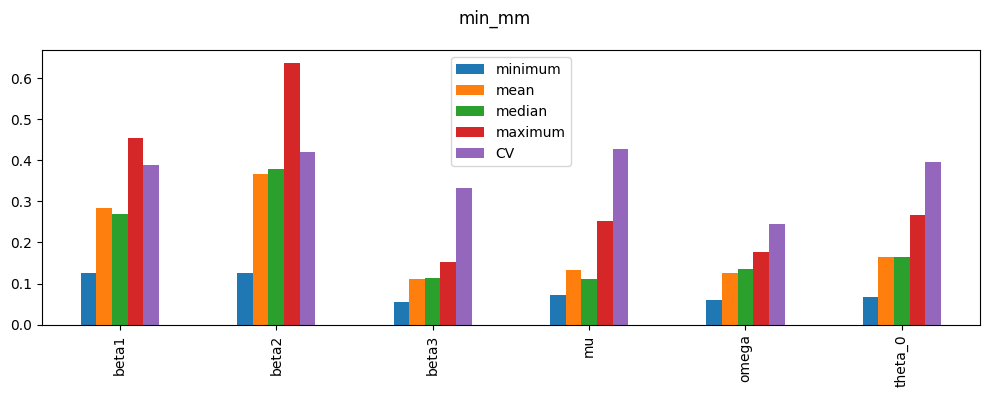

          minimum      mean    median   maximum        CV
beta1    0.126116  0.286121  0.270776  0.460565  0.391770
beta2    0.126488  0.371045  0.391569  0.643973  0.424328
beta3    0.059667  0.111653  0.114183  0.152530  0.311923
mu       0.065419  0.129702  0.107744  0.233946  0.411148
omega    0.059839  0.124442  0.132254  0.169271  0.255279
theta_0  0.069282  0.159461  0.155635  0.257068  0.384566


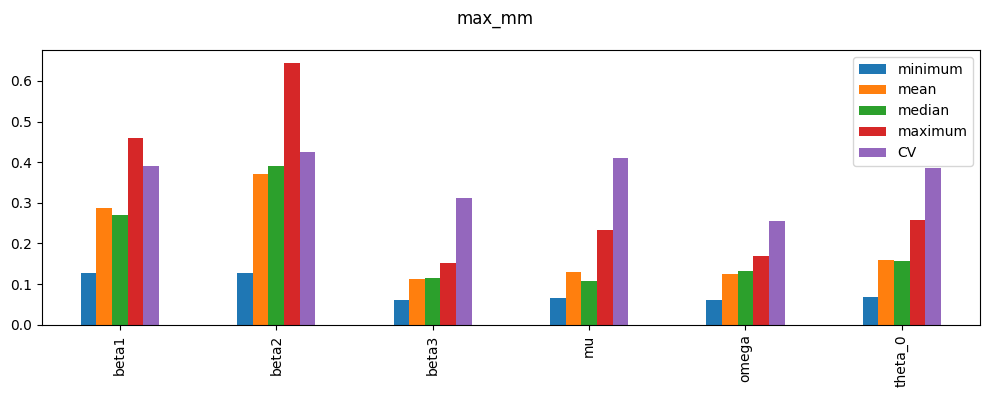

          minimum      mean    median   maximum        CV
beta1    0.108631  0.263982  0.254550  0.402902  0.363223
beta2    0.141741  0.354616  0.402043  0.571057  0.406828
beta3    0.066020  0.101462  0.099931  0.170759  0.273966
mu       0.076580  0.135322  0.129636  0.208362  0.276887
omega    0.063187  0.129759  0.111521  0.215917  0.417410
theta_0  0.069025  0.121772  0.113238  0.175595  0.284151


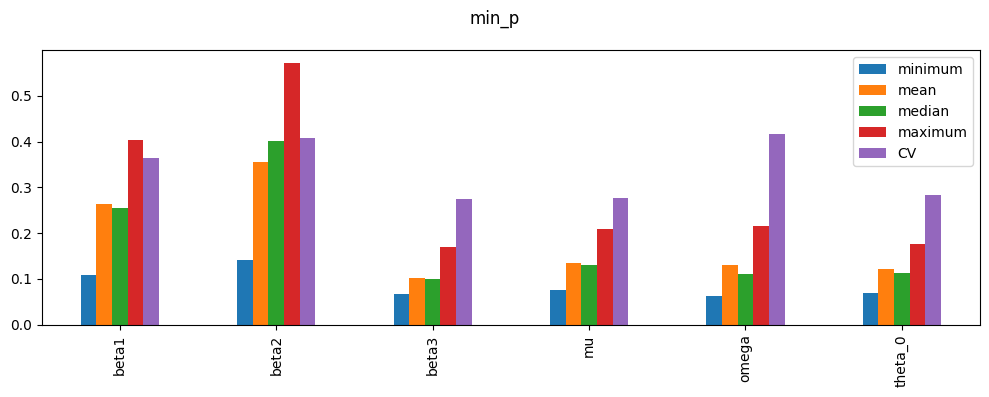

          minimum      mean    median   maximum        CV
beta1    0.109375  0.254353  0.254979  0.392857  0.342543
beta2    0.139137  0.345112  0.384658  0.521577  0.391394
beta3    0.071429  0.101525  0.100389  0.163318  0.239103
mu       0.070227  0.129785  0.130967  0.204241  0.303129
omega    0.075120  0.133923  0.125215  0.216146  0.335573
theta_0  0.054859  0.119199  0.110749  0.165093  0.290421


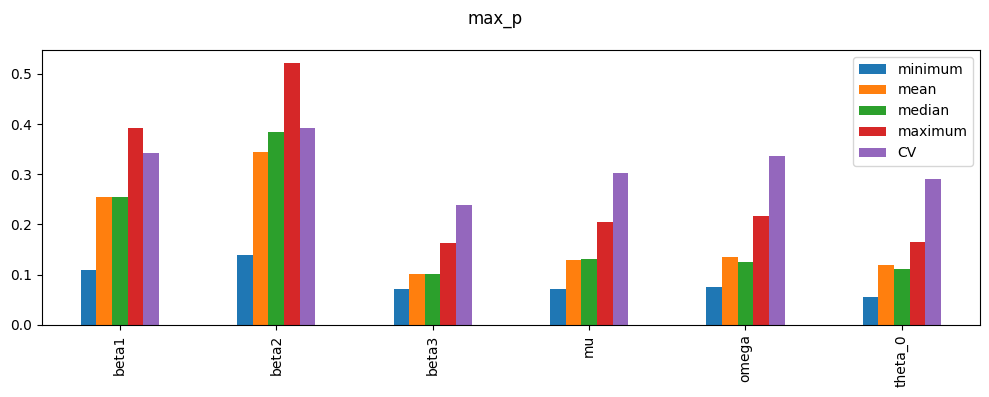

          minimum      mean    median   maximum        CV
beta1    0.098586  0.275435  0.266999  0.425595  0.380143
beta2    0.160714  0.376202  0.414492  0.603423  0.385525
beta3    0.060783  0.104688  0.093063  0.171131  0.324204
mu       0.103051  0.136936  0.111178  0.206645  0.277901
omega    0.068424  0.115035  0.108860  0.184667  0.272024
theta_0  0.079928  0.125601  0.120521  0.202381  0.246140


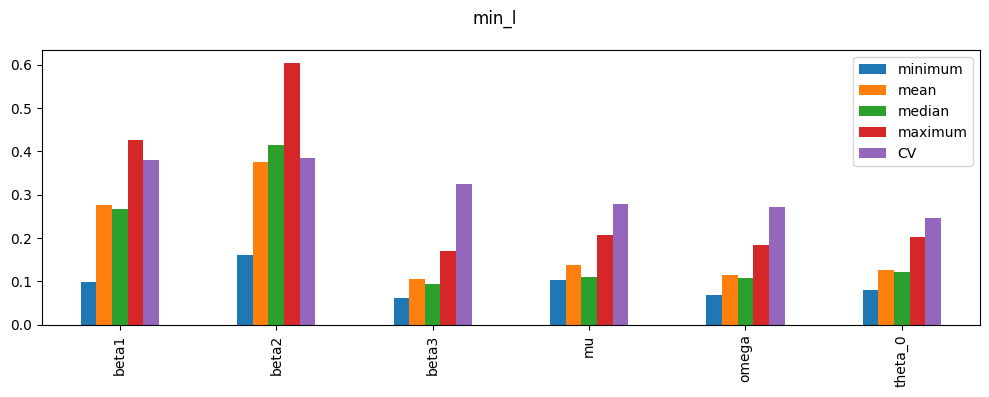

          minimum      mean    median   maximum        CV
beta1    0.104167  0.276457  0.272579  0.427827  0.380890
beta2    0.165179  0.379487  0.414320  0.604911  0.378470
beta3    0.057864  0.103941  0.089414  0.173363  0.340671
mu       0.098558  0.136639  0.112251  0.218922  0.293203
omega    0.065677  0.115453  0.105841  0.184839  0.307302
theta_0  0.076580  0.124928  0.121265  0.197545  0.243779


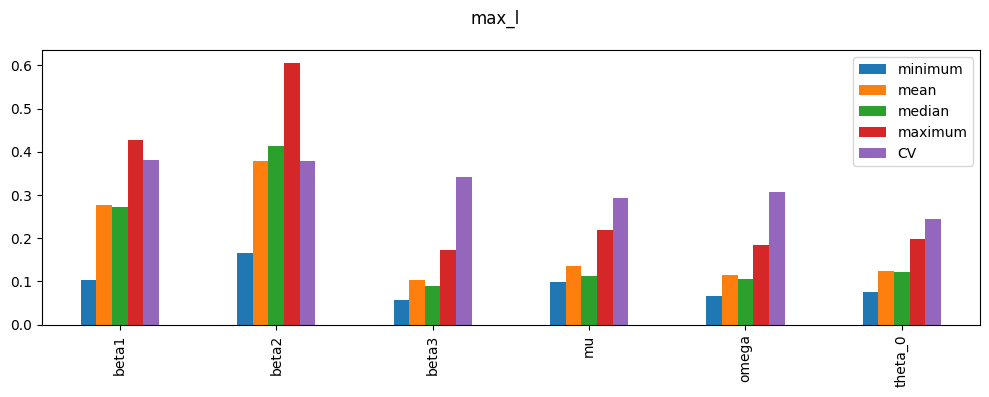

In [16]:
dep_vars = ['min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']
for i, name in zip(range(len(dep_vars)), dep_vars):

    Si_pawn = pawn.analyze(problem, X, Y[:,i], print_to_console=True)
    
    axes = Si_pawn.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()